In [5]:
from numba import jit
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras import backend
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import deque

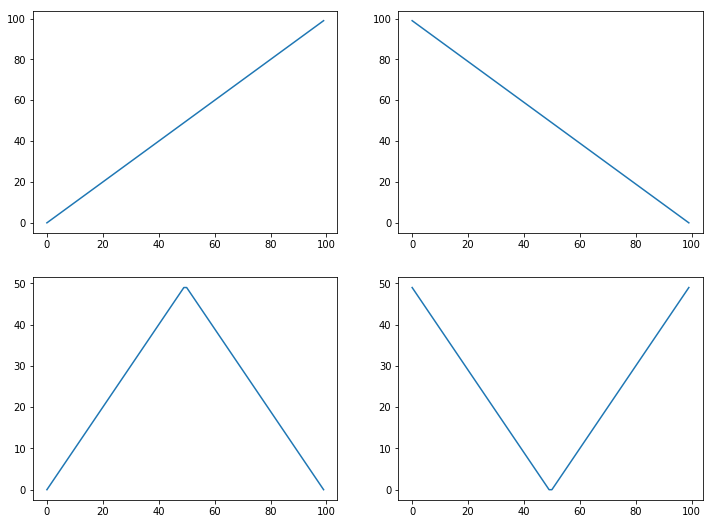

In [3]:
def create_linear_data(length=100, up=True):
    d = []
    if up:
        for i in range(length):
            d.append(i)
    else:
        for i in reversed(range(length)):
            d.append(i)
    return d

def create_point_data(length=100, up=True):
    d = []
    half = int(length/2)
    if up:
        for i in range(half):
            d.append(i)
        for i in reversed(range(half)):
            d.append(i)
    else:
        for i in reversed(range(half)):
            d.append(i)
            
        for i in range(half):
            d.append(i)
    return d


# Test the functions
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

f, ((p1, p2), (p3, p4)) = plt.subplots(2,2)
p1.plot(create_linear_data())
p2.plot(create_linear_data(up=False))
p3.plot(create_point_data())
p4.plot(create_point_data(up=False))
plt.show()

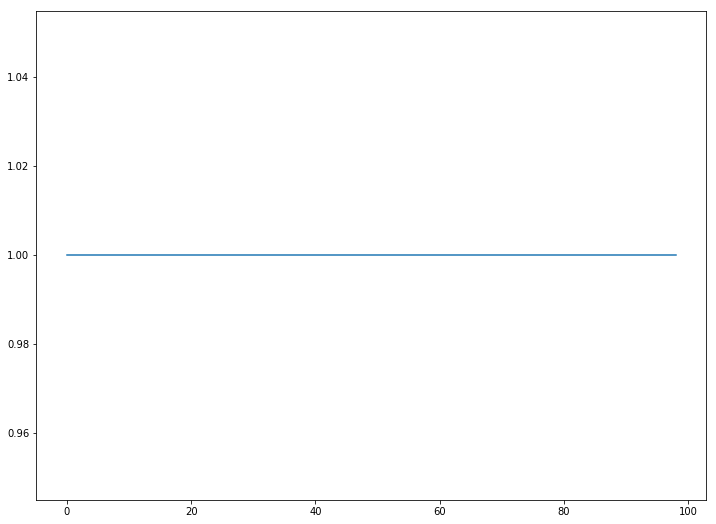

In [4]:
def calculate_difference(v1, v2):
    if v1 != 0:
        return (v2 - v1) / v1
    else:
        return v2

def prep_input(data):

    d=[]
    
    for i in range(len(data) - 1):
        v1 = data[i]
        v2 = data[i+1]
        diff = v2 - v1
        d.append(diff)
        #print("Difference between {} and {} = {}".format(v1, v2, diff))
        
    return d

class DQN_Agent:
    
    def __init__(self, model, action_size, epsilon=0.3, gamma=0.9, epsilon_decay=False, epsilon_decay_rate=1e-5):
        self.model = model
        self.action_size = action_size
        self.epsilon = epsilon
        self.gamma = gamma
        self.epsilon_decay = epsilon_decay
        self.epsilon_decay_rate = epsilon_decay_rate
        
    def act(self, state):
        
        # Return a random action
        if (random.random() < self.epsilon):
            action = np.random.randint(0, self.action_size)
            
            if self.epsilon_decay:
                self.epsilon = self.epsilon - self.epsion_decay_rate
            
            return action
        
        # Have the model predict an action
        else:
            q = model.predict(state)
            return np.argmax(q)
    
    def remember(self, state, action, next_state, reward):
        
    
        
        
data = create_linear_data()
data_prepped = prep_input(data)

